# What Problem We Have and Which Metric to Use?

1-Based on the data and data dictionary, We have prediction / regression problem.


2-We wil make prediction on the target variable PRICE



3-And we will build a model to get best prediction on the price variable.

In [684]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# The solution is divided into the following sections:
Data understanding and exploration
Data cleaning
Data preparation
Model building and evaluation

The column“Price” is the target variable and rest of the columns are independent variables.
The independent variables are again divided into Categorical and Numerical variables.

In [685]:
##Loading and Reading Data
cars = pd.read_csv('Data.csv')
cars.head()

,Make,Type,Year,Origin,Options,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Full,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,Full,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Standard,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Standard,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Semi Full,Automatic,41912,Riyadh,59500


In [686]:
print ("Rows     : " ,cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
   

Rows     :  8035
Columns  :  9


In [687]:
cars.head()

,Make,Type,Year,Origin,Options,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Full,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,Full,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Standard,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Standard,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Semi Full,Automatic,41912,Riyadh,59500


In [688]:
cars.tail()

,Make,Type,Year,Origin,Options,Gear_Type,Mileage,Region,Price
8030,Audi,A6,2015,Saudi,Full,Automatic,77000,Riyadh,75000
8031,Chevrolet,Camaro,2010,Saudi,Full,Automatic,150000,Riyadh,53000
8032,Toyota,Land Cruiser,2013,Gulf Arabic,Full,Automatic,260,Najran,0
8033,Nissan,Altima,2011,Saudi,Full,Automatic,18500,Aseer,22000
8034,Cadillac,Other,2013,Saudi,Full,Automatic,256000,Al-Medina,40000


In [689]:
cars.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Options', 'Gear_Type', 'Mileage',
       'Region', 'Price'],
      dtype='object')

In [690]:
cars.dtypes

Make         object
Type         object
Year          int64
Origin       object
Options      object
Gear_Type    object
Mileage       int64
Region       object
Price         int64
dtype: object

In [691]:
cars_backup = cars.copy()

<AxesSubplot:>

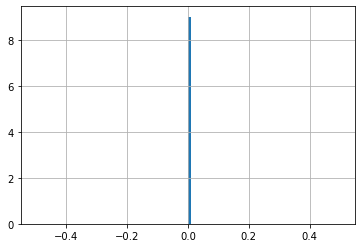

In [692]:
#Data Cleaning: Cleaning Strings in Column and values
missing= pd.isnull(cars)
missing_ratio= missing.sum()/len(missing)
missing_ratio.hist(bins=100)

No missing values and no duplicates.


In [693]:
cars.describe()

,Year,Mileage,Price
count,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,1.491488e+05,5.369984e+04
std,5.757228,3.474480e+05,7.198472e+04
min,1963.000000,1.000000e+02,0.000000e+00
25%,2012.000000,3.700000e+04,0.000000e+00
50%,2016.000000,1.019600e+05,3.700000e+04
75%,2018.000000,1.950000e+05,7.375000e+04
max,2022.000000,2.000000e+07,1.150000e+06


As we can see . There are no null values present in the data set. But there are values of Price is 0 . Let's check that also!

In [694]:
cars["Price"]=cars["Price"].replace(0,np.nan)



In [695]:
cars.isna().sum()



Make            0
Type            0
Year            0
Origin          0
Options         0
Gear_Type       0
Mileage         0
Region          0
Price        2527
dtype: int64

In [696]:
cars.dropna( inplace = True)

We change those values to Null then Removed them!



In [697]:
cars.duplicated().sum()



16

In [698]:
cars.drop_duplicates(inplace=True)

There were some duplicate values we removed those!



In [699]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 0 to 8034
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       5492 non-null   object 
 1   Type       5492 non-null   object 
 2   Year       5492 non-null   int64  
 3   Origin     5492 non-null   object 
 4   Options    5492 non-null   object 
 5   Gear_Type  5492 non-null   object 
 6   Mileage    5492 non-null   int64  
 7   Region     5492 non-null   object 
 8   Price      5492 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 429.1+ KB


let's check the Price first.


In [700]:
cars['Price'].describe()

count    5.492000e+03
mean     7.827891e+04
std      7.508188e+04
min      1.000000e+00
25%      3.500000e+04
50%      5.800000e+04
75%      9.425000e+04
max      1.150000e+06
Name: Price, dtype: float64

Distribution of price

# Visualizing the data


/Users/hadelalenezi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

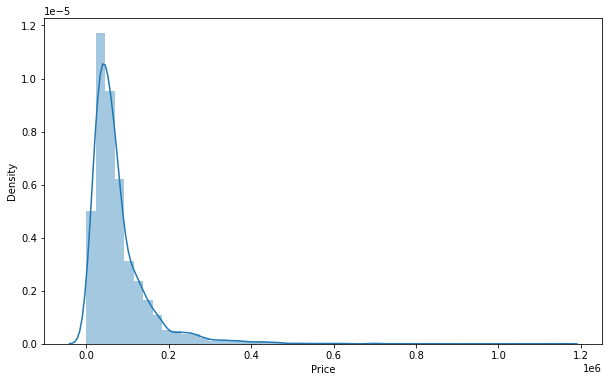

In [701]:
plt.figure(figsize=(10,6))
sns.distplot(cars.Price)

#cars['Price'].plot(
  #  kind='hist',
  #  title='Review Price Distribution')
#print("Skewness: %f" % cars['Price'].skew())
#print("Kurtosis: %f" % cars['Price'].kurt())


Even though target variable has right skewness, I will not make any transformation on it.


RELATIONSHIP OF PRICE WITH OTHER PARAMETER¶

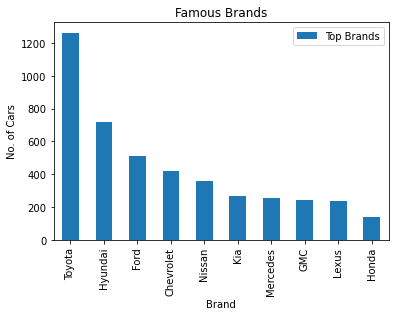

In [702]:
topbrands= cars.groupby('Make')['Make'].count()
topbrands = pd.DataFrame(topbrands)
topbrands.columns = ['Top Brands']
topbrands.sort_values(by=['Top Brands'], inplace=True, ascending=False)
topbrands = topbrands.head(10)

topbrands.plot.bar();

plt.title('Famous Brands')

plt.xlabel('Brand')
plt.ylabel('No. of Cars');

The bar plot shows that the people in Saudi prefer cars from Japenese brand as the most selling cars from the top 10 brands in Saudi are from Japenese brand. This is obvious as the most of the Japenese car companies have manufacturing plants in saudi

In [703]:
import plotly.express as px

px.treemap(cars.groupby(by='Type').sum().reset_index(), path=['Type'], labels='Type', 
           values='Price', title='Price vs Type')

From the above bar graph it can be easily visulaized that Land Crusier , Range Rover, LX , Tahoe and Yukon are very expensive used cars in Saudi Arabia   

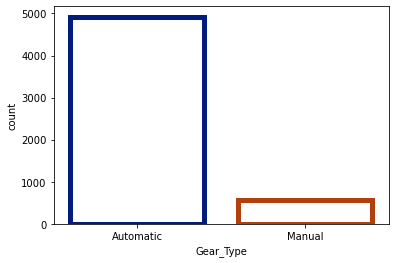

In [704]:
ax = sns.countplot(x="Gear_Type", data=cars,
                   facecolor=(0, 0, 0, 0),
                 linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))


This diagram will help in determing how Automatic Gear type used with more than 7000 cars. Along with that there is a low of using Manual cars



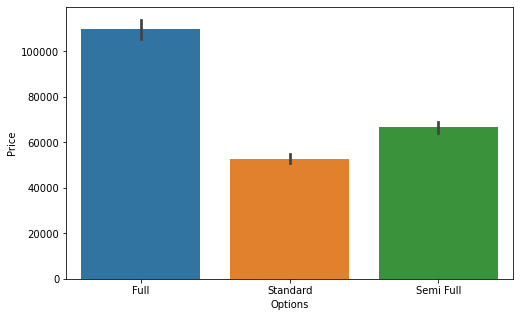

In [705]:
plt.rcParams['figure.figsize'] = [8,5]
plt.xlabel('Options')
plt.ylabel('Price')
sns.barplot(x="Options", y="Price", data=cars)
plt.show()

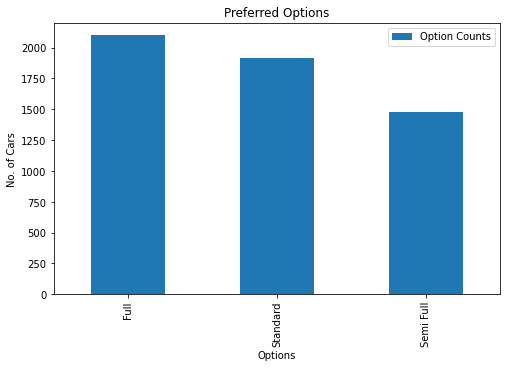

In [706]:
option= cars.groupby('Options')['Options'].count()
option = pd.DataFrame(option)
option.columns = ['Option Counts']
option.sort_values(by=['Option Counts'], inplace=True, ascending=False)
option = option.head(5)

option.plot.bar();

plt.title('Preferred Options')

plt.xlabel('Options')
plt.ylabel('No. of Cars');

From the above bar graph it can be easily visulaized that the people in Saudi prefer to drive Full cars. Semi Full cars have the lowest numbers of drivers in Saudi as this fuel is not available in abundant in Saudi

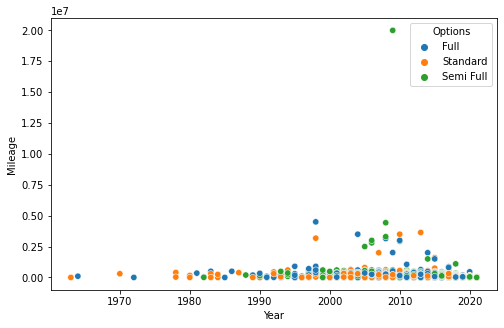

In [707]:
sns.scatterplot(x=cars.Year, y=cars['Mileage'], hue=cars.Options, s=40);



The above scatterplot shows that Saudi people like to drive cars of the used models i.e. released between 1970 and 2020. For the cars between 1980 and 2000 models, the preferred Options was standers as it is the cheapest available in Saudi. For the 2000 - 2020 model cars, the people tend to shift to the Full cars due to the shortage of standers in saudi lately

In [708]:
import plotly.express as px

px.treemap(cars.groupby(by='Region').sum().reset_index(), path=['Region'], labels='Fuel_Type', 
           values='Price', title='Price vs Region')

Certainly, Riyadh is the capital of saudi Arabia with the majorities of population has almost the half of the used vehicles.With price of the tatal is 186,854,782

<AxesSubplot:title={'center':'Price'}, xlabel='Region'>

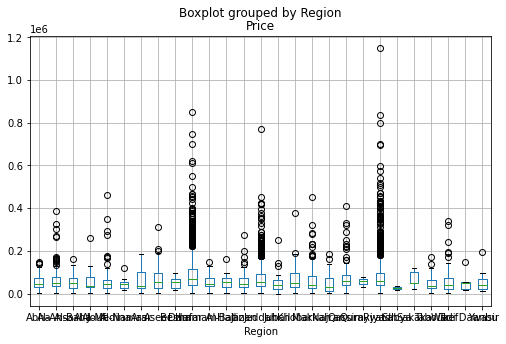

In [709]:
cars.boxplot(column='Price',by = 'Region')

/Users/hadelalenezi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



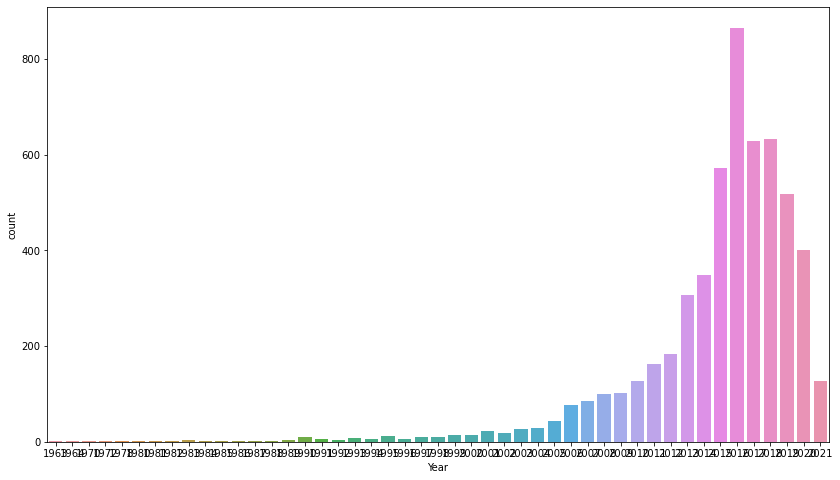

In [710]:
#palette = sns.color_palette("mako_r", 5)
#sns.lineplot(data=cars, x="Year", y="Price",palette=palette)
plt.rcParams['figure.figsize'] = [14,8]
plt.xlabel('Year')
plt.ylabel('Price')
sns.countplot('Year', data=cars)
plt.show()

### Step 2: EDA

**2.1 Visualizing Numerical Data**

In [711]:
cars['Year'].unique()

array([2018, 2019, 2011, 2017, 2014, 2020, 2016, 2021, 2015, 2013, 2008,
       1993, 2009, 2012, 2010, 2006, 2007, 1992, 2001, 2003, 1996, 2005,
       1984, 1995, 2000, 2002, 2004, 1998, 1982, 1997, 1994, 1999, 1990,
       1983, 1989, 1988, 1987, 1964, 1963, 1991, 1981, 1972, 1970, 1980,
       1978, 1986, 1985])

Processing Years to Derive Age of car
to understand how old cars is and its effect on price.so creating a new column Age . Current year would be 2021 and Age column would be Age= 2021-year.

In [712]:
# Calculate the age of the car
cars['Current_year']=2021

cars['age']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()


,Make,Type,Year,Origin,Options,Gear_Type,Mileage,Region,Price,age
0,Chrysler,C300,2018,Saudi,Full,Automatic,103000,Riyadh,114000.0,3
2,Nissan,Sunny,2019,Saudi,Standard,Automatic,72418,Riyadh,27500.0,2
3,Hyundai,Elantra,2019,Saudi,Standard,Automatic,114154,Riyadh,43000.0,2
4,Hyundai,Elantra,2019,Saudi,Semi Full,Automatic,41912,Riyadh,59500.0,2
5,Honda,Accord,2018,Saudi,Full,Automatic,39000,Riyadh,72000.0,3


In [713]:
cars.describe()

,Year,Mileage,Price,age
count,5492.000000,5.492000e+03,5.492000e+03,5492.000000
mean,2014.832302,1.395087e+05,7.827891e+04,6.167698
std,5.146277,3.353288e+05,7.508188e+04,5.146277
min,1963.000000,1.000000e+02,1.000000e+00,0.000000
25%,2013.000000,4.613425e+04,3.500000e+04,3.000000
50%,2016.000000,1.010000e+05,5.800000e+04,5.000000
75%,2018.000000,1.800000e+05,9.425000e+04,8.000000
max,2021.000000,2.000000e+07,1.150000e+06,58.000000


Chane the age spot 

In [714]:
cars = cars[["Make", "Type", "Year","Origin","Options","Gear_Type","Mileage","Region","age","Price"]]

print(cars)

           Make     Type  Year Origin    Options  Gear_Type  Mileage  \
0      Chrysler     C300  2018  Saudi       Full  Automatic   103000   
2        Nissan    Sunny  2019  Saudi   Standard  Automatic    72418   
3       Hyundai  Elantra  2019  Saudi   Standard  Automatic   114154   
4       Hyundai  Elantra  2019  Saudi  Semi Full  Automatic    41912   
5         Honda   Accord  2018  Saudi       Full  Automatic    39000   
...         ...      ...   ...    ...        ...        ...      ...   
8029        Kia  Sorento  2006  Saudi       Full     Manual   257000   
8030       Audi       A6  2015  Saudi       Full  Automatic    77000   
8031  Chevrolet   Camaro  2010  Saudi       Full  Automatic   150000   
8033     Nissan   Altima  2011  Saudi       Full  Automatic    18500   
8034   Cadillac    Other  2013  Saudi       Full  Automatic   256000   

         Region  age     Price  
0        Riyadh    3  114000.0  
2        Riyadh    2   27500.0  
3        Riyadh    2   43000.0  
4  

In [715]:
print ("Rows     : " ,cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns



Rows     :  5492
Columns  :  10


In [716]:
cars.dtypes

Make          object
Type          object
Year           int64
Origin        object
Options       object
Gear_Type     object
Mileage        int64
Region        object
age            int64
Price        float64
dtype: object

In [717]:
# Creating dummy variables for categorical columns
make_dummies = pd.get_dummies(cars.Make)
type_dummies = pd.get_dummies(cars.Type)
origin_dummies = pd.get_dummies(cars.Origin)
options_dummies = pd.get_dummies(cars.Options)
gear_type_dummies = pd.get_dummies(cars.Gear_Type)
region_dummies = pd.get_dummies(cars.Region)


merged = pd.concat([cars,make_dummies,type_dummies,origin_dummies,options_dummies,gear_type_dummies,region_dummies], axis = 'columns')
merged

,Make,Type,Year,Origin,Options,Gear_Type,Mileage,Region,age,Price,...,Najran,Qassim,Qurayyat,Riyadh,Sabya,Sakaka,Tabouk,Taef,Wadi Dawasir,Yanbu
0,Chrysler,C300,2018,Saudi,Full,Automatic,103000,Riyadh,3,114000.0,...,0,0,0,1,0,0,0,0,0,0
2,Nissan,Sunny,2019,Saudi,Standard,Automatic,72418,Riyadh,2,27500.0,...,0,0,0,1,0,0,0,0,0,0
3,Hyundai,Elantra,2019,Saudi,Standard,Automatic,114154,Riyadh,2,43000.0,...,0,0,0,1,0,0,0,0,0,0
4,Hyundai,Elantra,2019,Saudi,Semi Full,Automatic,41912,Riyadh,2,59500.0,...,0,0,0,1,0,0,0,0,0,0
5,Honda,Accord,2018,Saudi,Full,Automatic,39000,Riyadh,3,72000.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,Kia,Sorento,2006,Saudi,Full,Manual,257000,Dammam,15,15000.0,...,0,0,0,0,0,0,0,0,0,0
8030,Audi,A6,2015,Saudi,Full,Automatic,77000,Riyadh,6,75000.0,...,0,0,0,1,0,0,0,0,0,0
8031,Chevrolet,Camaro,2010,Saudi,Full,Automatic,150000,Riyadh,11,53000.0,...,0,0,0,1,0,0,0,0,0,0
8033,Nissan,Altima,2011,Saudi,Full,Automatic,18500,Aseer,10,22000.0,...,0,0,0,0,0,0,0,0,0,0


In [718]:
cars.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Options', 'Gear_Type', 'Mileage',
       'Region', 'age', 'Price'],
      dtype='object')

In [719]:
#Dropping columns for which dummy variables for created
# Dropping one column of dummy variable to avoid dummy variables trap
# Dropping other columns which are not required
merged.drop(['Make','Type','Origin','Options','Gear_Type','Region'], axis =1, inplace = True)

In [720]:
# imputing the DataFrame for NaN values in columns
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_merged = my_imputer.fit_transform(merged)
imputed_merged

array([[2.01800e+03, 1.03000e+05, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01900e+03, 7.24180e+04, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01900e+03, 1.14154e+05, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.01000e+03, 1.50000e+05, 1.10000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01100e+03, 1.85000e+04, 1.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01300e+03, 2.56000e+05, 8.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [721]:
# Converting the above formed array into a DataFrame
merged_df = pd.DataFrame(imputed_merged, columns = merged.columns)

In [722]:
X = merged_df.drop(['Price'], axis =1).values
y = merged_df['Price'].values

In [723]:
X.shape

(5492, 448)

In [724]:
X

array([[2.01800e+03, 1.03000e+05, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01900e+03, 7.24180e+04, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01900e+03, 1.14154e+05, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.01000e+03, 1.50000e+05, 1.10000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01100e+03, 1.85000e+04, 1.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01300e+03, 2.56000e+05, 8.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [725]:
y

array([114000.,  27500.,  43000., ...,  53000.,  22000.,  40000.])

In [726]:
##FEATURESSCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [727]:
#SPLITING DATASET INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
#print("y_train:",y_train.shape)
#print("y_test:",y_test.shape)


X_train: (4393, 448)
X_test: (1099, 448)


# I'll use RandomForestRegressor model as a base model
And then I will use Lasso,KNeighborsRegressor


In [728]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train,y_train)



RandomForestRegressor(random_state=0)

# Predict 

In [729]:
y_pred= regr.predict(X_test)

Testing RESULT

In [730]:
print(y_pred)

[34790.   64620.   77406.81 ... 60245.   67190.   14800.  ]


In [731]:
print(y_test)

[33000. 60000. 85000. ... 60000. 64000.  5000.]


# Calculating Accuracy

In [732]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100


82.2942382852305

In [733]:
print(regr.score(X_test, y_test)*100)
print(regr.score(X_train,y_train)*100)



82.2942382852305
96.78244338478291


In [734]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  14935.357261579791
Mean Squared  Error      :  869935955.201116
Root Mean Squared  Error :  29494.67672650636
R Squared Error          :  0.822942382852305


<ipython-input-735-3f8d524a5aba>:4: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Text(1, -0.5, ' As we can see that age and year are -ve corelated')

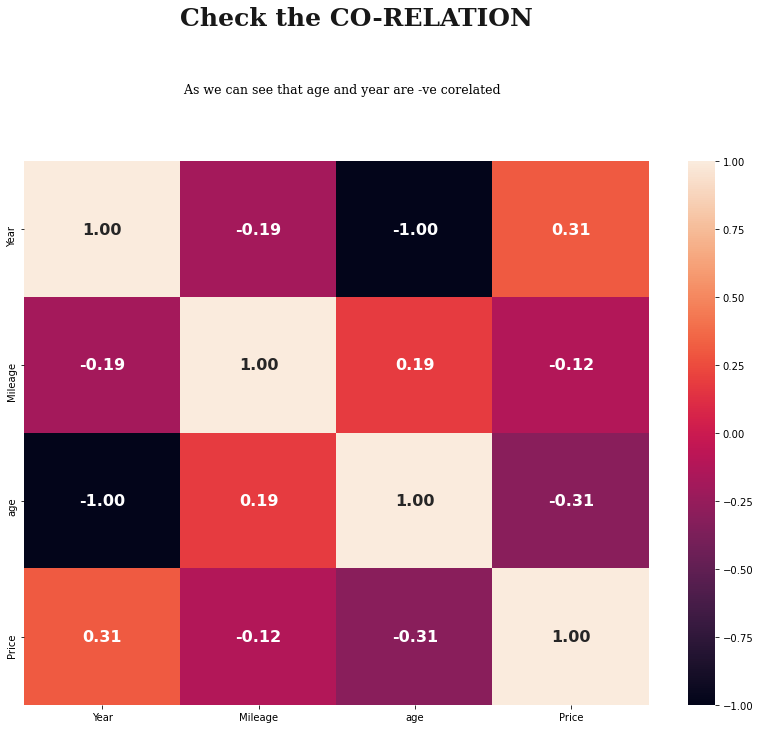

In [735]:
corr = cars.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax,annot_kws={'fontsize':16,'fontweight':'bold'});
plt.text(1,-1, 'Check the CO-RELATION  ' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)

plt.text(1,-0.5, ' As we can see that age and year are -ve corelated', 
        {'font':'Serif', 'size':'12.5','color': 'black'})

This is the list of the most influencing features for the price



Price has positive correlation to Year[0.31].Mileage [19] as well as Age
#Price has negative correlation to age [-0.31].

In [736]:

dataframe= pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),1),columns=['Predicted value','Real Value'])
print(dataframe)



      Predicted value  Real Value
0            34790.00     33000.0
1            64620.00     60000.0
2            77406.81     85000.0
3           205340.00    167000.0
4            66770.00     85000.0
...               ...         ...
1094         63370.00     55000.0
1095         48255.00     43000.0
1096         60245.00     60000.0
1097         67190.00     64000.0
1098         14800.00      5000.0

[1099 rows x 2 columns]


We can check linearity with the help of Scatterplot between the dependant and the independant varaible!

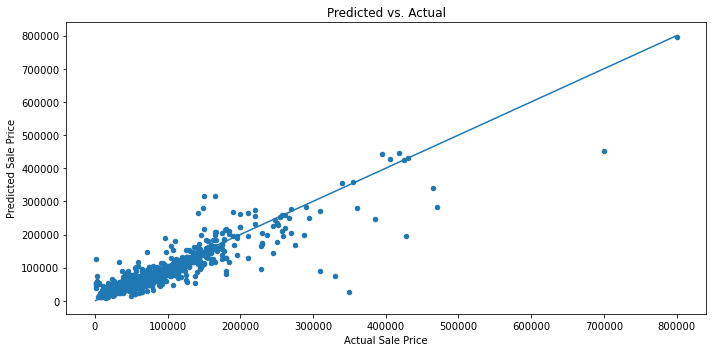

In [737]:

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

<ipython-input-738-c3e117b5d6a8>:13: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



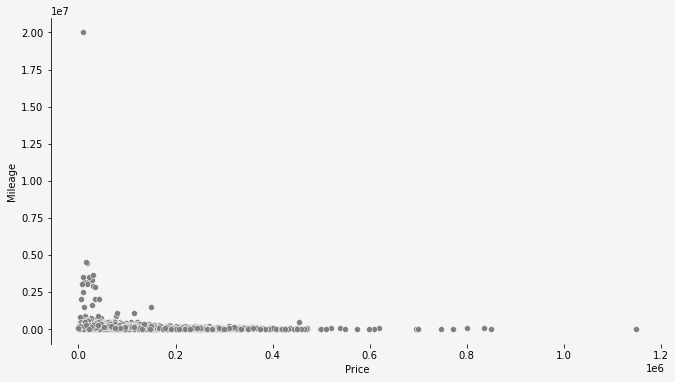

In [738]:
fig=plt.figure(figsize=(11,6))
ax=sns.scatterplot(x=cars["Price"],y=cars["Mileage"],color="grey")
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.show()

Modifying the model with transformed Target Values

# Now I am using Lasso 

In [739]:
from sklearn import metrics #Evalution 
from sklearn.linear_model import Lasso


In [740]:

las = Lasso()
ls_model_2 = Lasso().fit(X_train,y_train)


#PRedict the values
y_train_pred = ls_model_2.predict(X_train)

#Predict test values
y_test_pred = ls_model_2.predict(X_test)



/Users/hadelalenezi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1935242834068.7468, tolerance: 2554946647.215029



In [741]:
print(ls_model_2.score(X_train,y_train)*100)
print(ls_model_2.score(X_test, y_test)*100)


73.4544338646935
70.95475520648651


In [742]:
from sklearn.metrics import r2_score
from sklearn import metrics
predict = ls_model_2.predict(X_test)
r_2 = r2_score(y_test, predict)
print('The r2 score for the model is',r_2)

print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

The r2 score for the model is 0.7095475520648651
MAE: 20788.009294271724
MSE: 1427077986.281617
RMSE: 37776.68575036218


# Now I am using KNeighborsRegressor


In [743]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsRegressor()
knn_model_2 = KNeighborsRegressor().fit(X_train,y_train)


#PRedict the values
y_train_pred = knn_model_2.predict(X_train)

#Predict test values
y_test_pred = knn_model_2.predict(X_test)




In [744]:
predict = ls_model_2.predict(X_test)
print(knn_model_2.score(X_train,y_train)*100)
print(knn_model_2.score(X_test, y_test)*100)



73.30989026440689
65.55120807884525


# END 

In [746]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestRegressor(random_state=0)

rf.fit(X_test, y_test)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)*100}')


 rmse score is : 11738.1489, r2 score is 96.84


________________________________________________________________

## Summary:
As predicted in EDA, Price is an important factor in Car Price Prediction.
We have obtained 82% Accuracy using Random Forest.
We have obtained 70% Accuracy using Lasso.
We have obtained 65% Accuracy using LinearRegression.




# Conclusion

We have developed model to predict car price problem.

First, we made the detailed exploratory analysis.

We have decided which metric to use.
We analyzed both target and features in detail.
We transform categorical variables into numeric so we can use them in the model.
We transform numerical variables to reduce skewness and get close to normal distribution.
We looked at the results of the each model and selected the best one

# FUTURE WORKS
Keeping the current model as a baseline, we intend to use some advanced techniques algorithms to predict car prices as our future work.